In [73]:
import os, sys, codecs
import numpy as np
import pylab as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2

import matplotlib.cm as cm
import gzip
import pandas as pd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [74]:
zipfFileLoc = "data/zipflaw_data/zipflawdata.csv.gz"

df = pd.read_csv(zipfFileLoc)


In [89]:
#sortin by frequency
df = df.sort_values(by='count', ascending=False)

In [75]:
noOfHashtages = df['Hashtags'].unique().shape[0]
print(noOfHashtages)

719043


In [90]:
df.head()
#needs to be fixed

,Hashtags,count
484515,'coronavirus',2808572
78375,'coronavirus',1103720
487765,'covid19',655734
82949,'covid19',406239
61841,'china',292364


In [77]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gamma
from scipy.stats import dgamma
from scipy.stats import lognorm
from scipy.stats import dweibull
from scipy.stats import weibull_min
from scipy.stats import norm

In [78]:
modelsArray = []
count_list = df["count"].values.tolist()

0.2815508451579325 0 82.62904935727656
3.1700056658227758


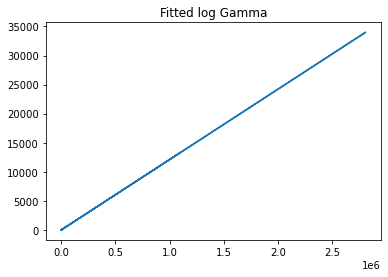

In [85]:
x = np.linspace(0,300,1000)
# Gamma

shape, loc, scale = gamma.fit(count_list, floc=0)
print(shape, loc, scale)
y = gamma.logpdf(count_list, shape, loc, scale)


log_likelihood = np.sum(-y)
print(log_likelihood/noOfHashtages)
simpleGamma = ['gamma', shape, loc, scale, log_likelihood/noOfHashtages]
modelsArray.append(simpleGamma)
plt.title('Fitted log Gamma')
plt.plot(count_list, -y)
plt.show()

In [80]:

shape, loc, scale = dgamma.fit(count_list, floc=0)
print(shape, loc, scale)
y = dgamma.logpdf(count_list, shape, loc, scale)
log_likelihood = np.sum(-y)
print(log_likelihood/noOfHashtages)
doubleGamma = ['double gamma', shape, loc, scale, log_likelihood/noOfHashtages]
modelsArray.append(doubleGamma)

0.28155073731775265 0 82.62901869149172
3.8631538103685767


In [81]:
# Log Normal
shape, loc, scale = lognorm.fit(count_list, floc=0)
print(shape, loc, scale)
y = lognorm.logpdf(count_list, shape, loc, scale)
log_likelihood = np.sum(-y)
print(log_likelihood/noOfHashtages)
logNormal = ['log normal', shape, loc, scale, log_likelihood/noOfHashtages]
modelsArray.append(logNormal)

1.1443576489736416 0.0 1.958701099819162
2.2260666527782713


In [82]:
# Weibull
shape, loc, scale = weibull_min.fit(count_list, floc=0)
#print(data_tuple)
print(shape, loc, scale)
y = weibull_min.logpdf(count_list, shape, loc, scale)
log_likelihood = np.sum(-y)
print(log_likelihood/noOfHashtages)
weibull_minM = ['weibull min', shape, loc, scale, log_likelihood/noOfHashtages]
modelsArray.append(weibull_minM)

0.5461024386423596 0 3.7950016727652853
2.638423009440263


In [83]:
#shifted gamma
shape, loc, scale = gamma.fit(count_list)
print(shape, loc, scale)
y = gamma.logpdf(count_list, shape, loc, scale)
print(y)

log_likelihood = np.sum(-y)
print(log_likelihood/noOfHashtages)
shiftedGamma = ['shifted', shape, loc, scale, log_likelihood/noOfHashtages]
modelsArray.append(shiftedGamma)

1.1498806374997866e-05 0.9999999999999999 1.5896064466240716
[ 25.36311213  25.36311213  25.36311213 ...  25.36311213 -12.00235254
 -12.00235254]
3.504639188737276


In [86]:
#printing the results
print(modelsArray)
table_df = pd.DataFrame(modelsArray, columns = ['Model', 'shape', 'loc', 'scale', 'log_likelihood/M'])
table_df.head()

[['double gamma', 0.28155073731775265, 0, 82.62901869149172, 3.8631538103685767], ['log normal', 1.1443576489736416, 0.0, 1.958701099819162, 2.2260666527782713], ['weibull min', 0.5461024386423596, 0, 3.7950016727652853, 2.638423009440263], ['shifted', 1.1498806374997866e-05, 0.9999999999999999, 1.5896064466240716, 3.504639188737276], ['gamma', 0.2815508451579325, 0, 82.62904935727656, 3.1700056658227758]]


,Model,shape,loc,scale,log_likelihood/M
0,double gamma,0.281551,0.0,82.629019,3.863154
1,log normal,1.144358,0.0,1.958701,2.226067
2,weibull min,0.546102,0.0,3.795002,2.638423
3,shifted,0.000011,1.0,1.589606,3.504639
4,gamma,0.281551,0.0,82.629049,3.170006
